In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('troop_movements.csv')
print(df.head())

             timestamp  unit_id    unit_type empire_or_resistance  location_x  \
0  2025-07-08 14:12:50        1        at-at               empire           4   
1  2025-07-08 14:12:49        2        at-at               empire           3   
2  2025-07-08 14:12:48        3       x-wing               empire           7   
3  2025-07-08 14:12:47        4      unknown               empire          10   
4  2025-07-08 14:12:46        5  tie_fighter               empire           4   

   location_y  destination_x  destination_y homeworld  
0           9             10             10      Tund  
1           7              7              2   Iktotch  
2           9              8              7   Stewjon  
3           6              8              6  Toydaria  
4           9              7              8      Tund  


In [43]:
empire_resistance_counts = df['empire_or_resistance'].value_counts()
print("Empire vs Resistance Counts: ")
print(empire_resistance_counts)

Empire vs Resistance Counts: 
empire_or_resistance
empire        521
resistance    479
Name: count, dtype: int64


In [44]:
homeworld_counts = df['homeworld'].value_counts()
print("Home World Counts:")
print(homeworld_counts)

Home World Counts:
homeworld
Kashyyyk        34
Dorin           33
Stewjon         32
Haruun Kal      32
Dagobah         31
Toydaria        30
Zolan           29
Serenno         29
Umbara          28
Vulpter         28
Mirial          26
Skako           26
Bestine IV      26
Ojom            26
Tatooine        26
Kalee           25
Aleen Minor     25
Dathomir        24
Troiken         24
Ryloth          24
Trandosha       24
Naboo           24
Corellia        23
Iktotch         22
Sullust         22
Concord Dawn    21
Tholoth         21
Rodia           21
Chandrila       21
Champala        21
Alderaan        20
Eriadu          20
Shili           20
Muunilinst      19
Iridonia        19
Tund            19
Malastare       18
Glee Anselm     18
Cerea           18
Quermia         17
Mon Cala        17
Socorro         17
Name: count, dtype: int64


In [45]:
unit_type_counts = df['unit_type'].value_counts()
print("Unit Type Counts:")
print(unit_type_counts)

Unit Type Counts:
unit_type
tie_silencer          144
x-wing                142
at-st                 131
unknown               123
stormtrooper          122
resistance_soldier    117
at-at                 112
tie_fighter           109
Name: count, dtype: int64


In [46]:
df['is_resistance'] = df['empire_or_resistance'] == 'resistance'
print("Added is_resistance feature:")
print(df.head())

Added is_resistance feature:
             timestamp  unit_id    unit_type empire_or_resistance  location_x  \
0  2025-07-08 14:12:50        1        at-at               empire           4   
1  2025-07-08 14:12:49        2        at-at               empire           3   
2  2025-07-08 14:12:48        3       x-wing               empire           7   
3  2025-07-08 14:12:47        4      unknown               empire          10   
4  2025-07-08 14:12:46        5  tie_fighter               empire           4   

   location_y  destination_x  destination_y homeworld  is_resistance  
0           9             10             10      Tund          False  
1           7              7              2   Iktotch          False  
2           9              8              7   Stewjon          False  
3           6              8              6  Toydaria          False  
4           9              7              8      Tund          False  


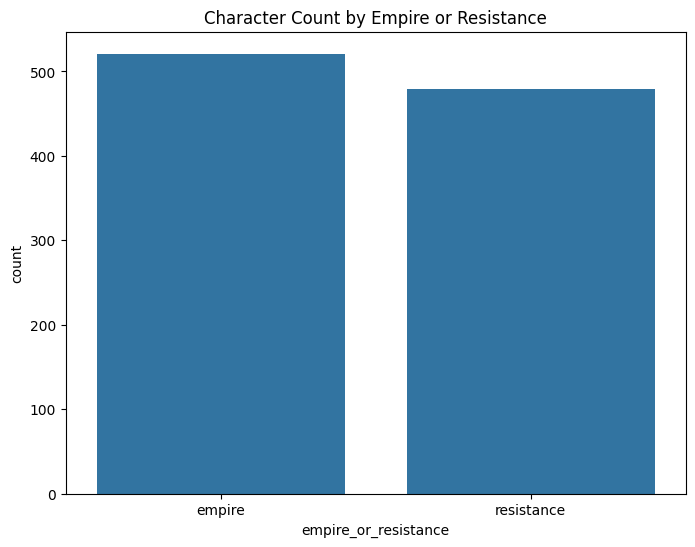

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='empire_or_resistance')
plt.title('Character Count by Empire or Resistance')
plt.show()

In [48]:
features = ['homeworld', 'unit_type']
df_encoded = pd.get_dummies(df, columns=features)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feature_columns = [col for col in df_encoded.columns if col.startswith('homeworld_') or col.startswith('unit_type_')]

X = df_encoded[feature_columns]
y = df_encoded['is_resistance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42, max_depth=10)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [50]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.58


In [51]:
importances = model.feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance')

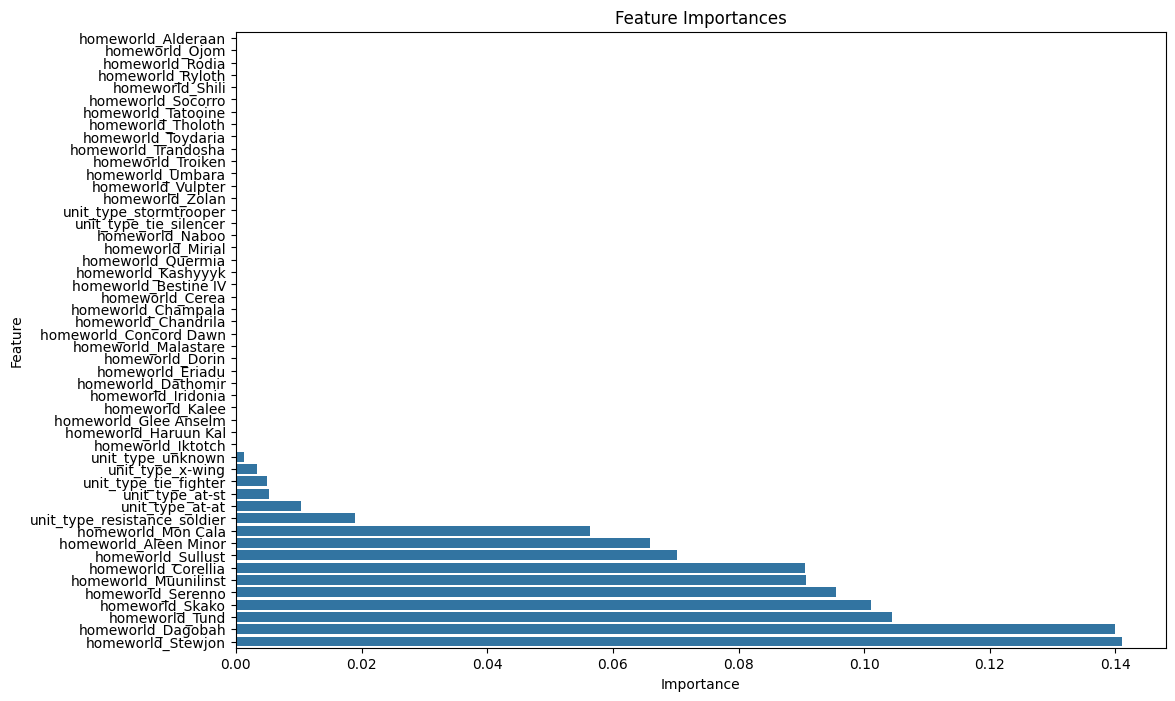

In [53]:
plt.figure(figsize=(12, 8))
sns.barplot(data=features_df, y='Feature', x='Importance')
plt.title('Feature Importances')
plt.show()

In [54]:
import pickle

with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [55]:
df_large = pd.read_csv('troop_movements_1m.csv')

In [56]:
df_large['unit_type'] = df_large['unit_type'].replace('invalid_unit', 'unknown')
invalid_units_count = (df_large['unit_type'] == 'invalid_unit').sum()
print("Invalid Units: ", invalid_units_count)


df_large['location_x'] = df_large['location_x'].fillna(method='bfill')
df_large['location_y'] = df_large['location_y'].fillna(method='bfill')
missing_location_x = df_large['location_x'].isna().sum()
missing_location_y = df_large['location_y'].isna().sum()
print("Missing Location X values: ", missing_location_x)
print("Missing Location Y values: ", missing_location_y)

Invalid Units:  0
Missing Location X values:  0
Missing Location Y values:  0


C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_8852\297337609.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_large['location_x'] = df_large['location_x'].fillna(method='bfill')
C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_8852\297337609.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_large['location_y'] = df_large['location_y'].fillna(method='bfill')


In [57]:
df_large.to_parquet('troop_movements_1m.parquet')

In [59]:
with open('trained_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

df_pred = pd.read_parquet('troop_movements_1m.parquet')

In [60]:
df_pred_encoded = pd.get_dummies(df_pred, columns=features)

X_pred = df_pred_encoded[feature_columns]
predictions = loaded_model.predict(X_pred)

df_pred['predictions'] = predictions
print(df_pred.head())

             timestamp  unit_id     unit_type  location_x  location_y  \
0  2023-06-03 03:19:15   919214  tie_silencer         2.0         5.0   
1  2023-02-24 13:50:40  9467154  stormtrooper         9.0         0.0   
2  2023-03-29 19:54:55  6585778  tie_silencer         0.0         6.0   
3  2023-04-30 00:58:11  3878023  tie_silencer         4.0         2.0   
4  2023-04-10 22:00:26  5537117         at-st         6.0         8.0   

   destination_x  destination_y    homeworld  predictions  
0              9              3  Aleen Minor        False  
1              9              1    Malastare         True  
2              5              9      Serenno        False  
3              9              9         Tund        False  
4              5              8        Skako        False  
